
Temperature Forecast Project using ML


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


EDA(Exploratory Data Analysis)

In [4]:
df.shape

(7752, 25)

In [ ]:
This dataset contain 7752 rows and 25 columns out of which 2 is target variable and remaining 23 are independent variables.

To check the data types of the columns

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

To check the null values

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.drop(['Date','station'],axis=1,inplace=True)

In [13]:
df.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

<Axes: >

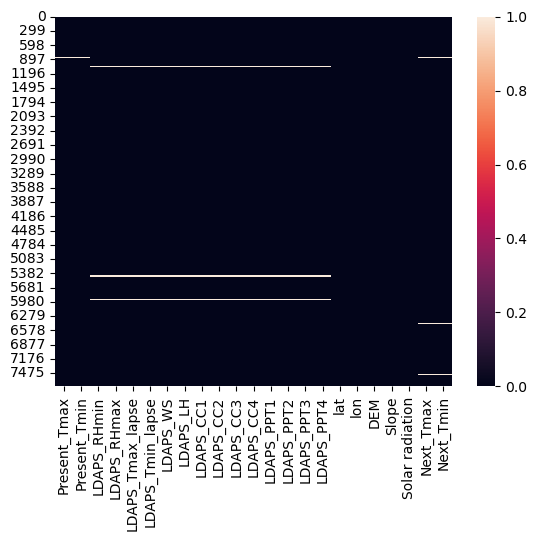

In [14]:
sns.heatmap(df.isnull())

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64


96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Length: 7664, dtype: int64


17.624954    2
38.542255    2
28.074101    1
33.291634    1
32.784998    1
            ..
27.856410    1
26.984258    1
29.085588    1
28.209551    1
27.939516    1
Name: LDAPS_Tmax_lapse, Length: 7675, 

In [16]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [17]:
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

In [18]:
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

In [19]:
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [20]:
df.isnull().sum()

Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [21]:
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

In [22]:
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

In [23]:
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

In [24]:
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

In [25]:
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

In [26]:
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

In [27]:
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

In [28]:
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

In [30]:
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

In [31]:
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

In [32]:
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

In [33]:
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [34]:
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [35]:
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [36]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Here, we can see all the null values has been removed

<Axes: >

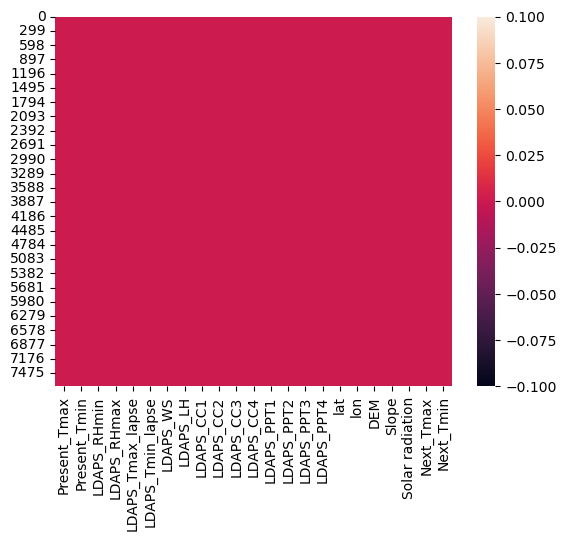

In [37]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

In [38]:
df.nunique().to_frame('number of unique values')

,number of unique values
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676
LDAPS_CC1,7570
LDAPS_CC2,7583


Description of dataset(it gives the statistical summary of numerical columns)

In [39]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is same as median so no skewness present in the dataset. and 75% and Max values there is difference hence outliers are present in the dataset.

Data Visulization

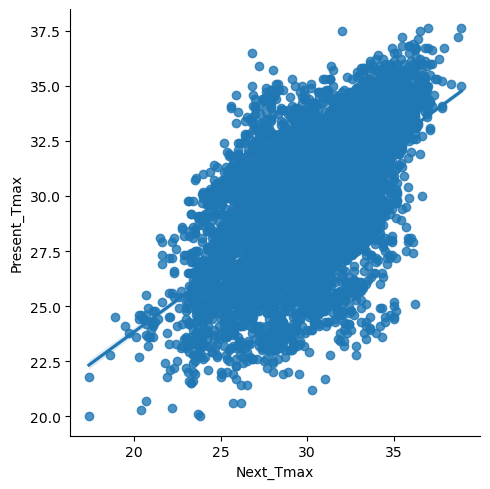

In [40]:
sns.lmplot(x='Next_Tmax',y='Present_Tmax',data=df,palette='colorblind')

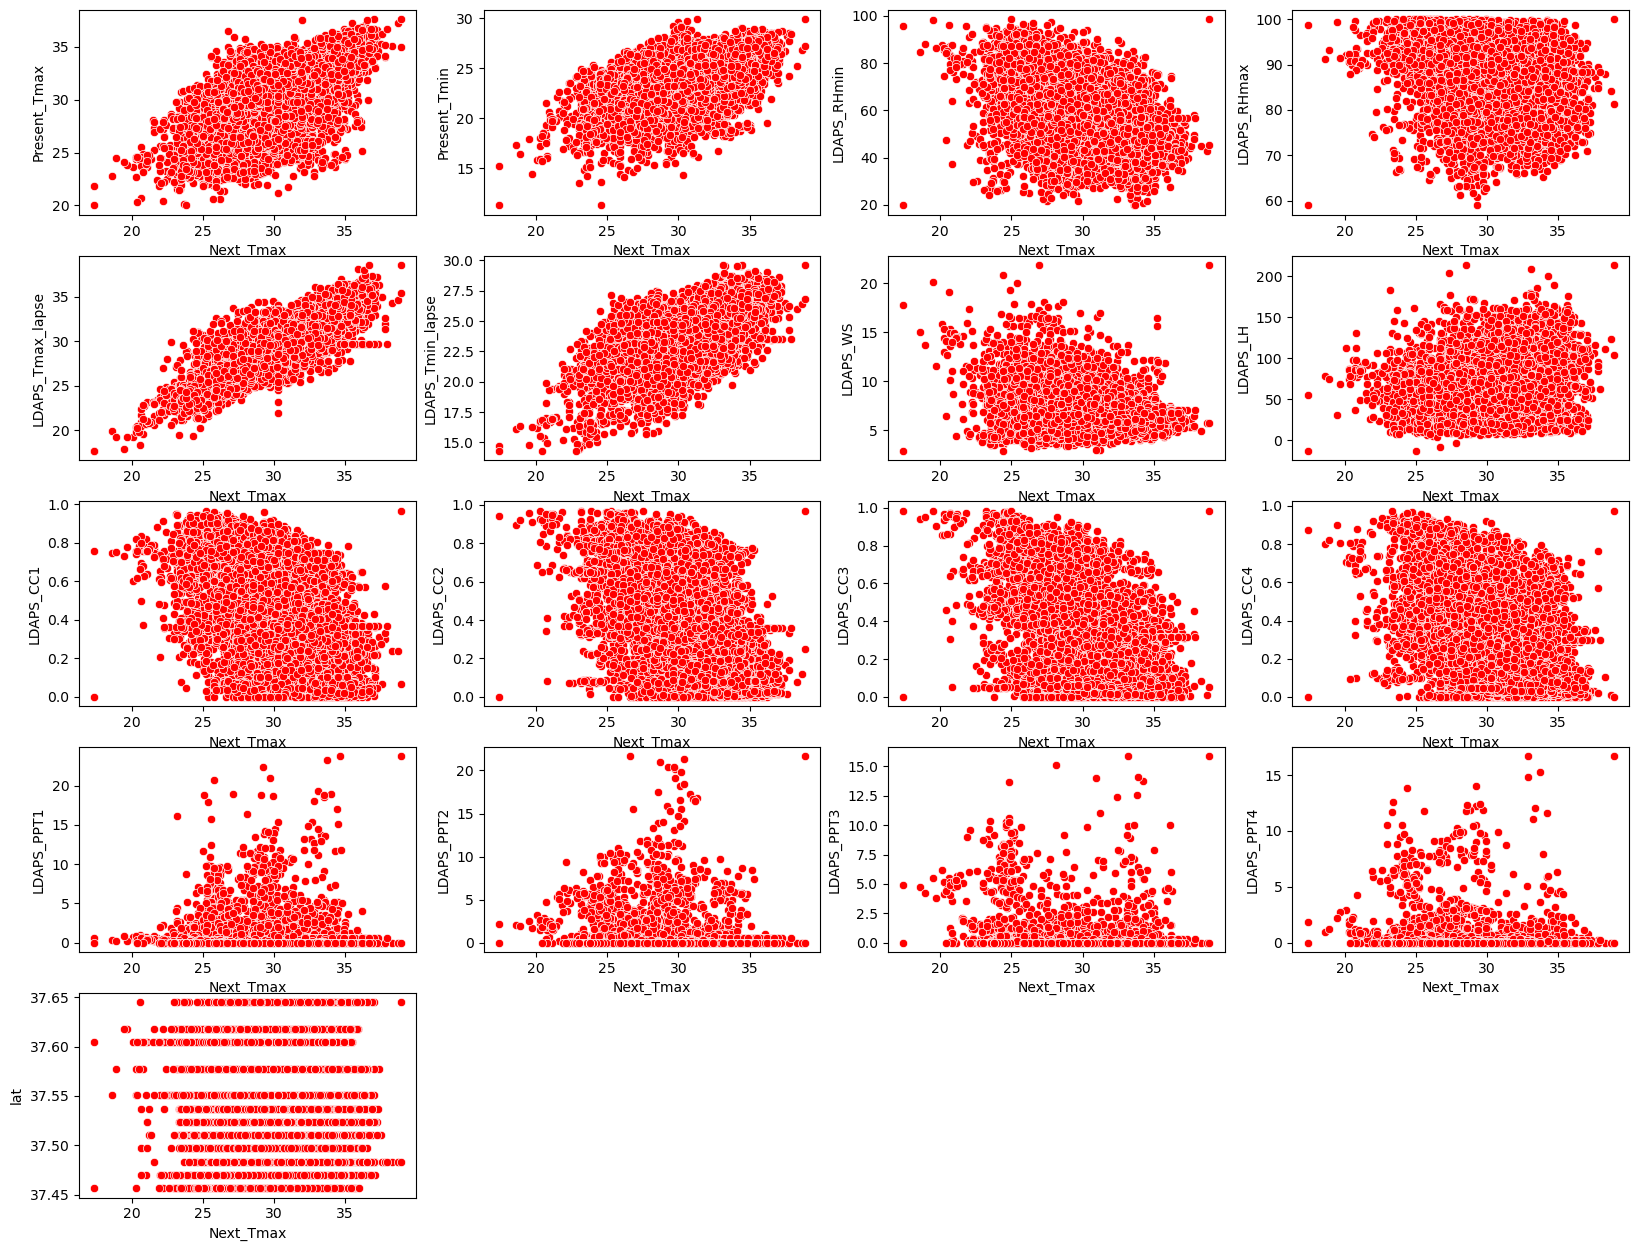

In [41]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(8,4,p)
        sns.scatterplot(x='Next_Tmax',y=i,data=df,color='r')
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
plt.show()

Here we are checking outliers.

Present_Tmax           Axes(0.125,0.786098;0.0824468x0.0939024)
Present_Tmin        Axes(0.223936,0.786098;0.0824468x0.0939024)
LDAPS_RHmin         Axes(0.322872,0.786098;0.0824468x0.0939024)
LDAPS_RHmax         Axes(0.421809,0.786098;0.0824468x0.0939024)
LDAPS_Tmax_lapse    Axes(0.520745,0.786098;0.0824468x0.0939024)
LDAPS_Tmin_lapse    Axes(0.619681,0.786098;0.0824468x0.0939024)
LDAPS_WS            Axes(0.718617,0.786098;0.0824468x0.0939024)
LDAPS_LH            Axes(0.817553,0.786098;0.0824468x0.0939024)
LDAPS_CC1              Axes(0.125,0.673415;0.0824468x0.0939024)
LDAPS_CC2           Axes(0.223936,0.673415;0.0824468x0.0939024)
LDAPS_CC3           Axes(0.322872,0.673415;0.0824468x0.0939024)
LDAPS_CC4           Axes(0.421809,0.673415;0.0824468x0.0939024)
LDAPS_PPT1          Axes(0.520745,0.673415;0.0824468x0.0939024)
LDAPS_PPT2          Axes(0.619681,0.673415;0.0824468x0.0939024)
LDAPS_PPT3          Axes(0.718617,0.673415;0.0824468x0.0939024)
LDAPS_PPT4          Axes(0.817553,0.6734

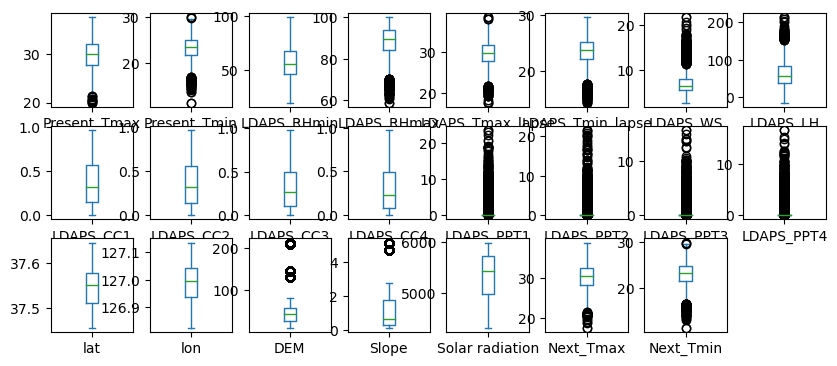

In [42]:
df.plot(kind='box',subplots=True,layout=(7,8),figsize=(10,10))

As we have found outliers in the column Present_Tmax ,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope .To remove outliers Zscore is using before building the model

In [43]:

from scipy.stats import zscore
out_features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']]
z=np.abs(zscore(out_features))
z


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
0,0.361326,0.759529,0.102515,0.383078,0.524889,0.216663,0.305750,0.276489,0.240636,0.224453,2.772243,1.115004
1,0.721084,0.676296,0.308027,0.311586,0.080895,0.223848,0.305750,0.276489,0.240636,0.224453,0.315157,0.542158
2,0.619608,0.031188,0.552814,0.614982,0.162936,0.451210,0.305750,0.276489,0.240636,0.224453,0.526218,0.723133
3,0.754909,0.072805,0.101426,1.133054,0.031092,0.079874,0.305750,0.276489,0.240636,0.224453,0.297588,0.932424
4,0.551957,0.551446,0.040098,0.248765,0.170325,0.011187,0.305750,0.276489,0.240636,0.224453,0.494322,0.548433
...,...,...,...,...,...,...,...,...,...,...,...,...
7747,2.187892,2.549048,2.056591,1.328126,1.112066,2.029679,0.305750,0.276489,0.240636,0.224453,0.852681,0.803915
7748,2.187892,2.299348,2.241619,1.548184,0.887662,2.047744,0.305750,0.276489,0.240636,0.224453,0.821213,0.755095
7749,2.221718,2.424198,2.317504,1.555342,0.570780,2.137962,0.305750,0.276489,0.240636,0.224453,0.779043,0.719338
7750,3.304127,4.962817,2.532517,4.113443,4.087857,3.959146,0.305750,0.276489,0.240636,0.224453,0.911963,0.845455


In [44]:
threshold=3
np.where(z>3)

(array([  25,   26,   27,   28,   29,   30,   33,   35,   36,   37,   38,
          39,   41,   43,   44,   45,   46,   47,   48,   49,  150,  151,
         152,  153,  154,  155,  156,  157,  158,  159,  160,  161,  162,
         163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,
         174,  279,  280,  282,  283,  284,  285,  286,  288,  289,  290,
         292,  295,  296,  297,  298,  299,  304,  305,  305,  307,  307,
         308,  308,  309,  309,  310,  310,  311,  311,  312,  313,  313,
         314,  315,  315,  317,  317,  320,  321,  321,  322,  323,  323,
         324,  324,  325,  326,  327,  328,  329,  331,  337,  339,  341,
         343,  344,  347,  353,  356,  369,  402,  411,  413,  416,  424,
         525,  525,  526,  526,  527,  528,  528,  529,  530,  530,  531,
         531,  532,  532,  533,  533,  534,  534,  535,  536,  536,  537,
         538,  538,  539,  539,  540,  540,  541,  542,  542,  543,  543,
         544,  544,  545,  545,  546, 

In [45]:
df1=df[(z<3).all(axis=1)]

In [46]:
df1.shape

(7010, 23)

In [47]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 7752
new dataframe: 7010


In [48]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 9.571723426212591


As you can see there is less than 10% of data loss after removing the outliers so it is considerable

In [49]:
df1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


checking the Skewness

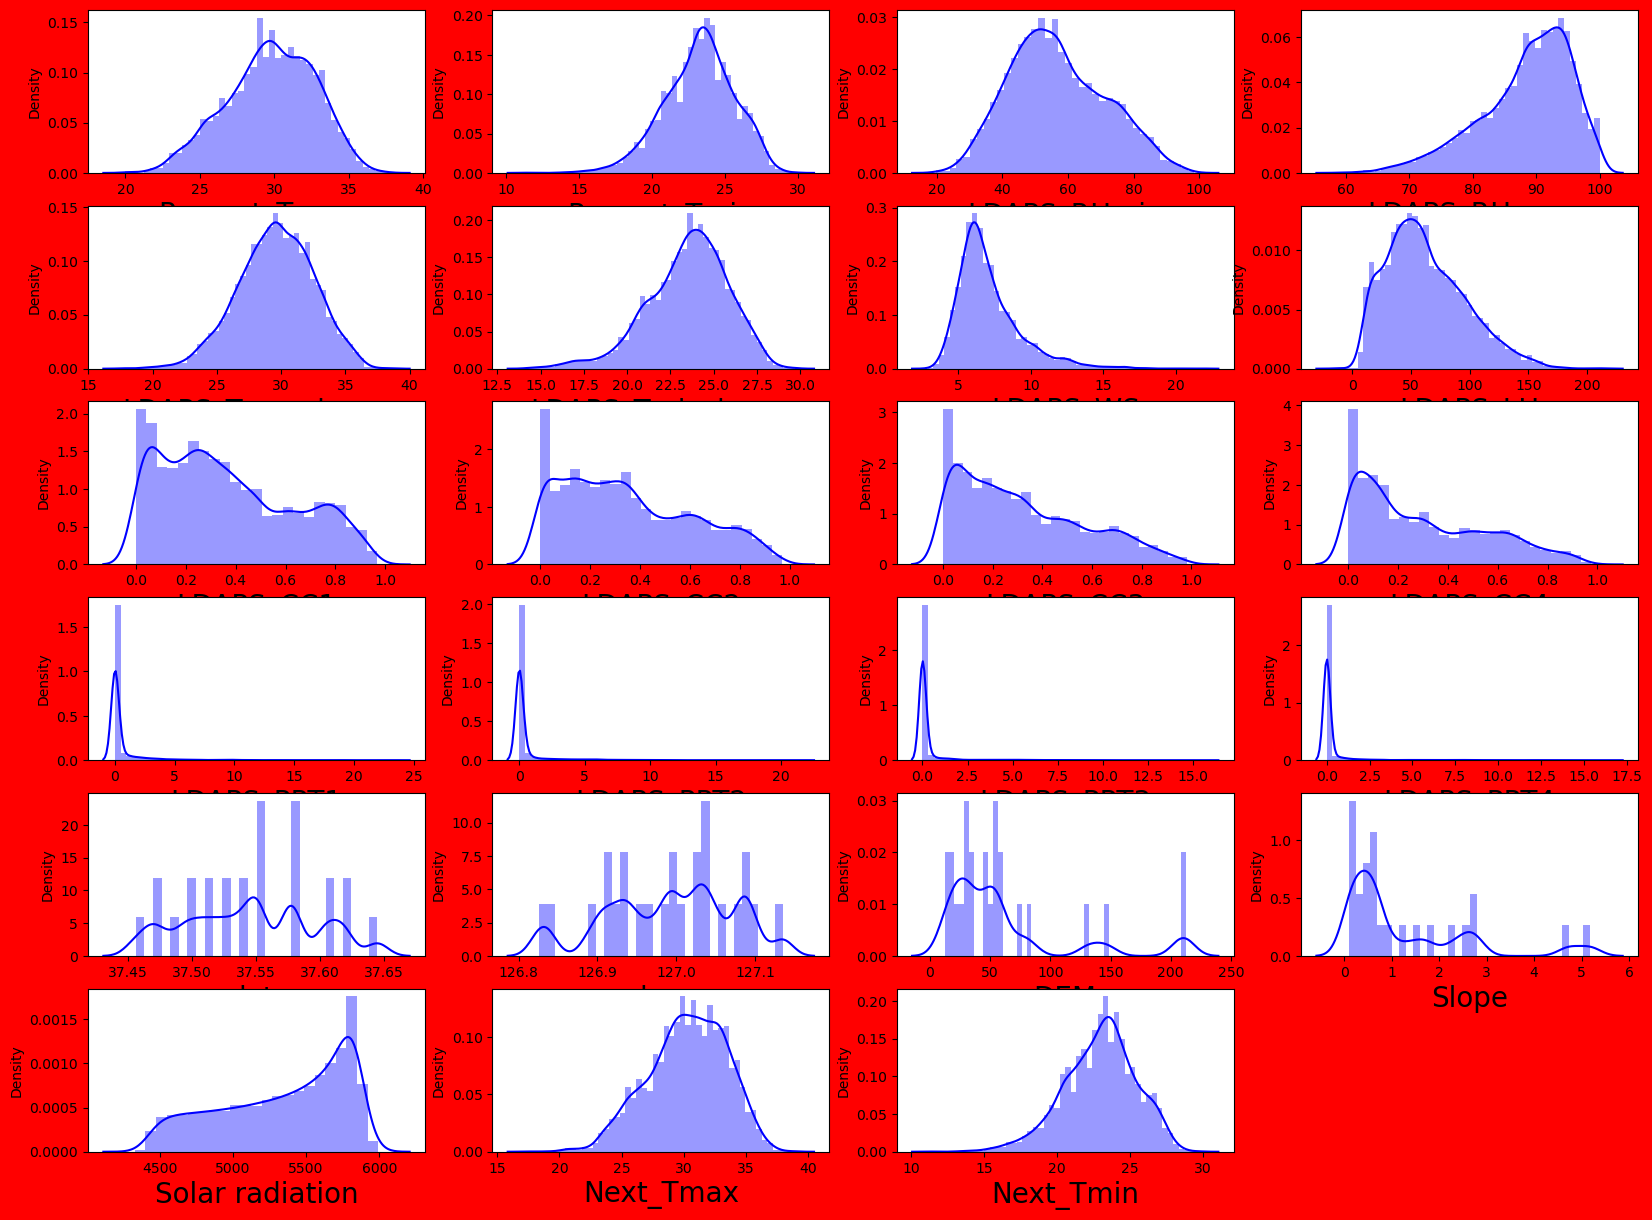

In [50]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()


In [51]:
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [52]:
df['LDAPS_RHmax']=np.cbrt(df['LDAPS_RHmax'])

In [53]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])

In [54]:
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])

In [55]:
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])

In [56]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])

In [57]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [58]:
df['DEM']=np.cbrt(df['DEM'])

In [59]:
df['Slope']=np.cbrt(df['Slope'])

In [60]:
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -1.003054
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.884657
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.922841
LDAPS_PPT2          2.223126
LDAPS_PPT3          2.523911
LDAPS_PPT4          2.792122
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

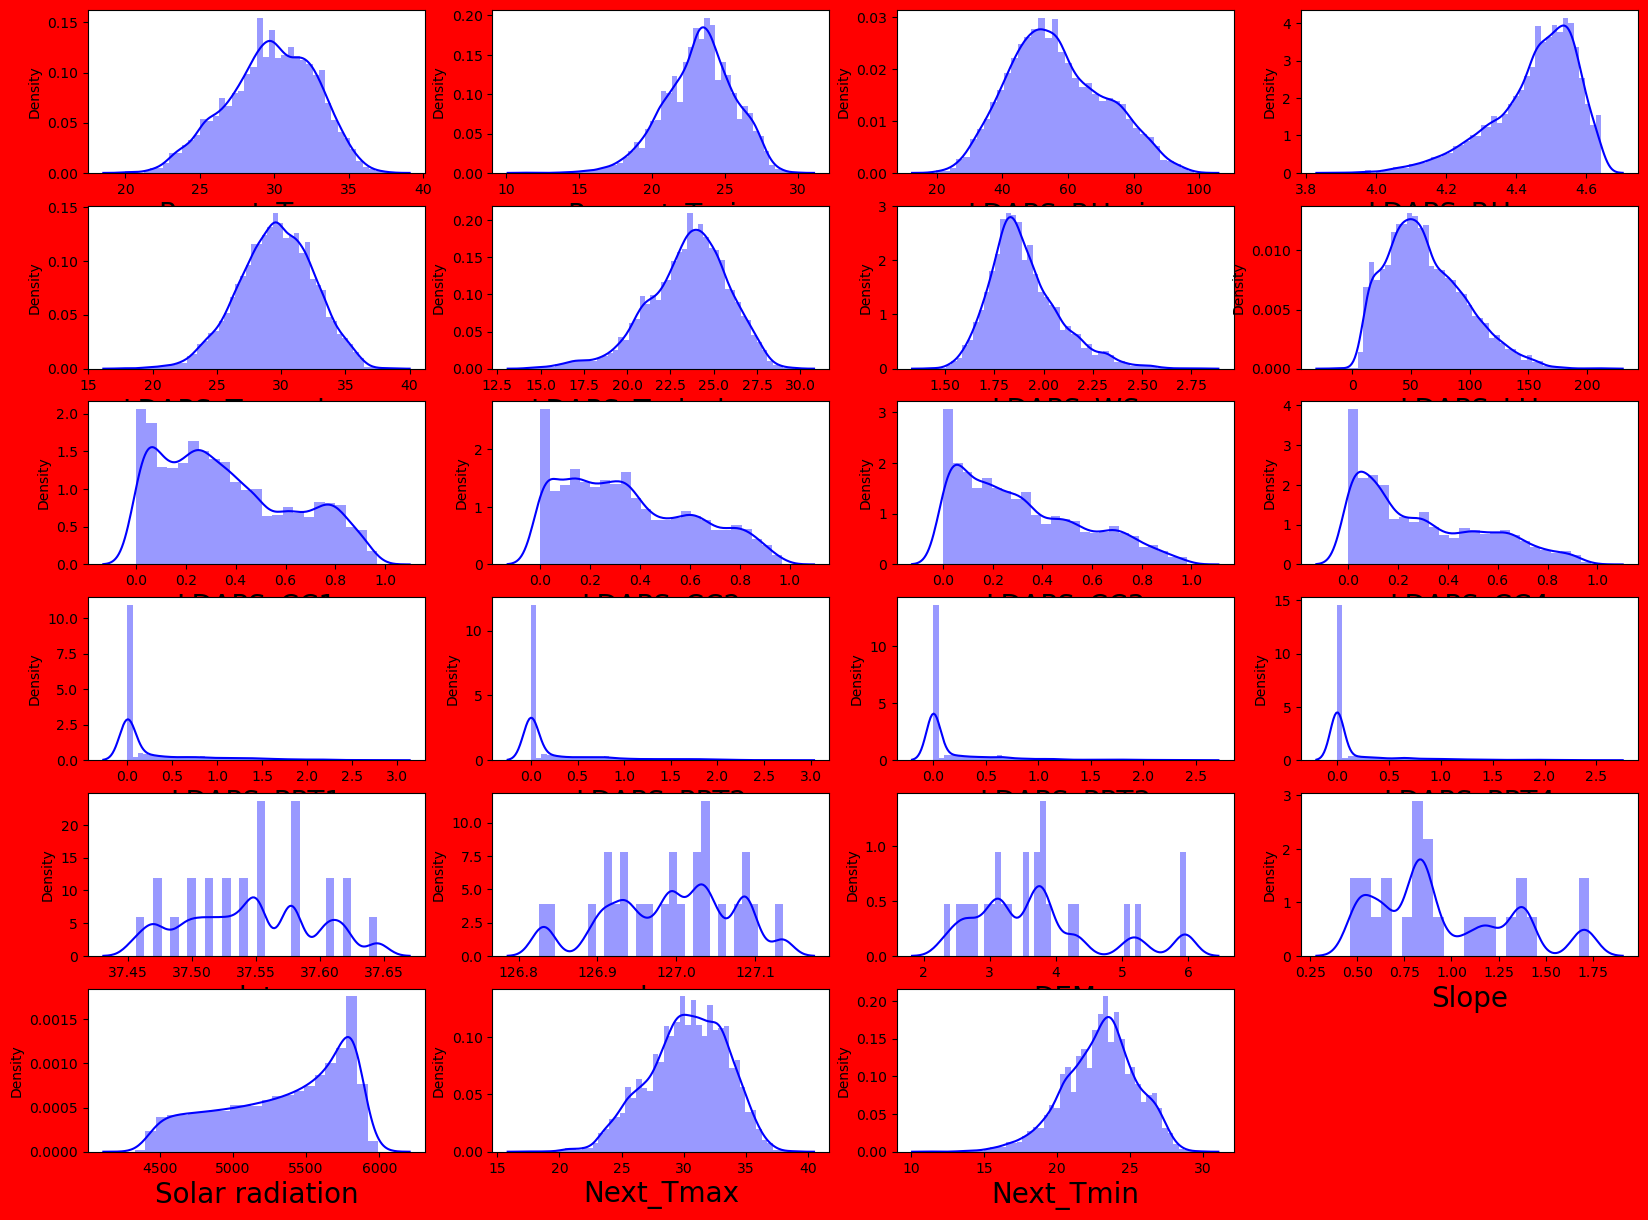

In [61]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=24:
        ax=plt.subplot(10,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()


Checking the Correlation b/w Target variable and Independent variable.

In [62]:
df.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618760,-0.204571,-0.295430,0.570129,0.623496,-0.115984,0.135463,-0.311805,-0.213791,...,-0.140507,-0.124956,-0.116687,-0.052615,0.009020,-0.172526,-0.109443,-0.025439,0.610348,0.622741
Present_Tmin,0.618760,1.000000,0.123143,-0.010997,0.464151,0.762993,-0.020634,-0.009258,0.084447,0.090263,...,0.095301,-0.013341,-0.082117,-0.078475,-0.043461,-0.256285,-0.165170,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.204571,0.123143,1.000000,0.573008,-0.564580,0.089476,0.277645,-0.070858,0.613818,0.745443,...,0.574584,0.434027,0.297530,0.087099,-0.076237,0.089954,0.101834,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.295430,-0.010997,0.573008,1.000000,-0.366242,-0.108330,0.115458,0.240272,0.430165,0.385788,...,0.358822,0.240591,0.171247,0.189176,0.027293,0.176358,0.198091,0.144415,-0.275805,-0.067165
LDAPS_Tmax_lapse,0.570129,0.464151,-0.564580,-0.366242,1.000000,0.654021,-0.285047,0.048010,-0.438439,-0.523619,...,-0.390553,-0.324153,-0.273588,-0.042093,0.090666,-0.161834,-0.137801,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.623496,0.762993,0.089476,-0.108330,0.654021,1.000000,-0.107131,-0.134761,0.010901,0.047727,...,-0.006724,-0.090729,-0.147907,-0.096257,-0.026701,-0.197767,-0.179961,0.159975,0.586983,0.880176
LDAPS_WS,-0.115984,-0.020634,0.277645,0.115458,-0.285047,-0.107131,1.000000,-0.007138,0.278418,0.245836,...,0.259164,0.205944,0.246598,0.024329,-0.063449,0.172025,0.148326,0.135285,-0.318685,-0.073254
LDAPS_LH,0.135463,-0.009258,-0.070858,0.240272,0.048010,-0.134761,-0.007138,1.000000,-0.147296,-0.264280,...,-0.112332,-0.017631,0.018437,0.133221,0.025822,0.041257,0.044336,-0.047384,0.157616,-0.055440
LDAPS_CC1,-0.311805,0.084447,0.613818,0.430165,-0.438439,0.010901,0.278418,-0.147296,1.000000,0.779683,...,0.598085,0.314314,0.224084,-0.008131,-0.006843,-0.015332,-0.020085,0.218309,-0.452541,-0.011028
LDAPS_CC2,-0.213791,0.090263,0.745443,0.385788,-0.523619,0.047727,0.245836,-0.264280,0.779683,1.000000,...,0.704141,0.422128,0.290461,-0.001497,-0.003581,-0.013505,-0.017549,0.170403,-0.490756,0.031250


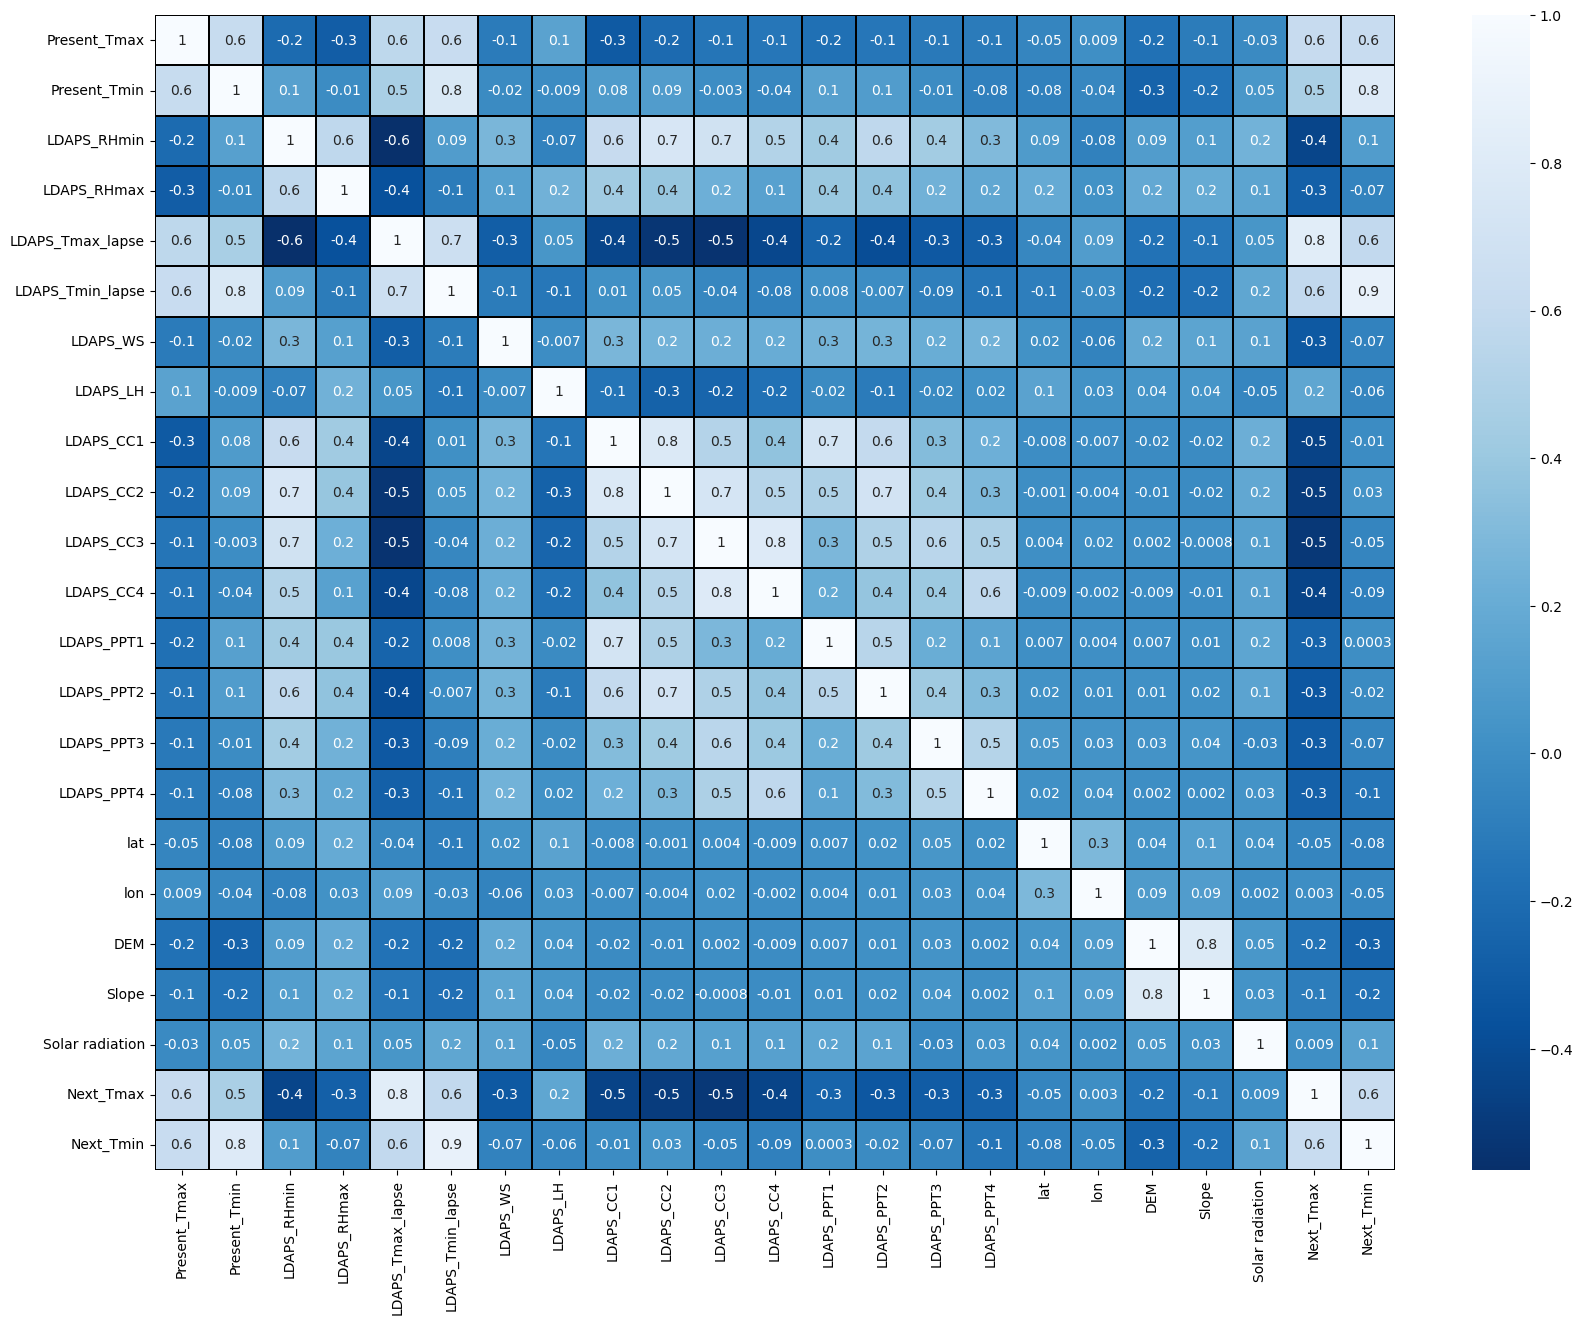

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [64]:
x=df1.drop('Next_Tmax',axis=1)

In [65]:
y=df1['Next_Tmax']

Feature scaling using StandardScaler method.

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [67]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-0.433732,-0.822071,0.183154,0.430631,-0.642970,-0.277493,-0.072376,0.198747,-0.451848,-0.534217,...,-0.34975,-0.285957,-0.267779,-0.248057,1.197415,0.001733,2.787755,1.119094,1.546119,-0.777147
1,0.682666,-0.735420,-0.247266,0.356757,0.002158,0.183851,-0.620158,-0.315791,-0.485458,-0.334509,...,-0.34975,-0.285957,-0.267779,-0.248057,1.197415,0.516228,-0.312564,-0.541529,1.252130,-0.231998
2,0.578004,0.001112,-0.503905,-0.600693,0.089528,0.421966,-0.403215,-1.237216,-0.549835,-0.310741,...,-0.34975,-0.285957,-0.267779,-0.248057,0.660150,0.842493,-0.524508,-0.722881,1.238436,0.355085
3,0.717553,0.044438,0.182012,1.205603,-0.050880,-0.134235,-0.640494,0.089324,-0.521844,-0.442001,...,-0.34975,-0.285957,-0.267779,-0.248057,2.001323,0.390741,-0.294921,0.936132,1.222757,0.522824
4,0.508229,-0.605444,0.033636,0.291841,-0.265378,-0.062300,-0.599202,1.330207,-0.780575,-0.341918,...,-0.34975,-0.285957,-0.267779,-0.248057,0.124875,1.808740,-0.492479,-0.547817,1.228912,-0.231998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,-2.387429,-2.381785,-2.227906,-1.425461,-0.737894,-2.388357,-0.177186,-1.559170,-1.172882,-1.258897,...,-0.34975,-0.285957,-0.267779,-0.248057,0.124875,0.616617,-0.654181,-0.499115,-2.109895,-2.244857
7006,-2.596754,-2.555087,-1.839609,-0.641637,-1.140164,-2.607782,-0.583124,0.571699,-1.118882,-1.282467,...,-0.34975,-0.285957,-0.267779,-0.248057,-0.681023,1.193855,-0.734314,-0.820066,-2.143724,-2.496464
7007,-2.317654,-2.685063,-2.080491,-1.337606,-1.268284,-2.176251,-0.398017,0.275321,-1.263957,-1.046715,...,-0.34975,-0.285957,-0.267779,-0.248057,-0.143758,-1.253133,-0.852337,-0.803832,-2.140131,-2.077118
7008,-2.317654,-2.425111,-2.274478,-1.564998,-1.029305,-2.195169,-0.206560,-0.453750,-1.240700,-1.072046,...,-0.34975,-0.285957,-0.267779,-0.248057,-0.412390,-1.027257,-0.820737,-0.754911,-2.151884,-1.783577


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,2.642215,Present_Tmax
1,3.269763,Present_Tmin
2,6.013402,LDAPS_RHmin
3,2.193613,LDAPS_RHmax
4,6.934549,LDAPS_Tmax_lapse
5,8.420135,LDAPS_Tmin_lapse
6,1.247163,LDAPS_WS
7,1.518462,LDAPS_LH
8,3.533709,LDAPS_CC1
9,4.679115,LDAPS_CC2


As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building

Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [70]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.8003475370401131 On random states 84


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [72]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.7565499578646422
R2_score on train data: 78.20547661742054
Mean absolute error: 1.1098937857501576
Mean squared error: 2.1107526585113674
Root mean squared error: 1.4528429572776844


In [73]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.8918241872133871
R2_score on train data: 98.47010847267839
Mean absolute error: 0.7205078588608964
Mean squared error: 0.9379024231140565
Root mean squared error: 0.9684536246584328


In [74]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.853492987259385
R2_score on train data: 91.05184324617656
Mean absolute error: 0.8331347912598275
Mean squared error: 1.2702403496027117
Root mean squared error: 1.1270493998058433


In [75]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.8307798579394261
R2_score on train data: 86.79914697855028
Mean absolute error: 0.9257317907738567
Mean squared error: 1.4671669866848287
Root mean squared error: 1.211266686855058


In [76]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.756508362004764
R2_score on train data: 78.20457819567746
Mean absolute error: 1.1098304881861945
Mean squared error: 2.111113301586434
Root mean squared error: 1.452967068307618


In [77]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.7565499580806891
R2_score on train data: 78.20547661742042
Mean absolute error: 1.1098937826981379
Mean squared error: 2.110752656638204
Root mean squared error: 1.4528429566330299


In [78]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.7688320093129228
R2_score on train data: 100.0
Mean absolute error: 1.0276210129773
Mean squared error: 2.004265214438477
Root mean squared error: 1.415720740272769


In [79]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.9115742293894247
R2_score on train data: 100.0
Mean absolute error: 0.6569399387837069
Mean squared error: 0.7666662480732455
Root mean squared error: 0.8755947967371925


Now we can check cross valdiation of all the model

In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.72235184 0.69320473 0.71308917 0.73193727 0.69038406]
0.7101934167270112
difference b/w R2_score and cross_val_score is: 4.635654113763099


In [81]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.60422507 0.45978196 0.54624398 0.60575023 0.5895818 ]
0.5611166062379438
difference b/w R2_score and cross_val_score is: 29.237638102144125


In [82]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.7046329  0.67161682 0.69193039 0.76086662 0.67597243]
0.7010038315644924
difference b/w R2_score and cross_val_score is: 12.97760263749337


In [83]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.72330654 0.69344892 0.71290197 0.73243172 0.69096452]
0.7106107337971066
difference b/w R2_score and cross_val_score is: 4.589762820765742


In [84]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.72235186 0.69320473 0.71308917 0.73193728 0.69038406]
0.7101934199171641
difference b/w R2_score and cross_val_score is: 4.635653816352503


In [85]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.41683076 0.44114901 0.45652539 0.5446659  0.46986331]
0.46580687349261946
difference b/w R2_score and cross_val_score is: 30.30251358203034


In [86]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_etr)-score7.mean())*100)

[0.71629662 0.65818306 0.69836495 0.73829123 0.67269493]
0.6967661578522371
difference b/w R2_score and cross_val_score is: 21.48080715371876


In [87]:
score8=cross_val_score(Rfr,x,y)
print(score8)
print(score8.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Rfr)-score8.mean())*100)

[0.71045059 0.67165415 0.69026313 0.71722964 0.6568791 ]
0.6892953238812602
difference b/w R2_score and cross_val_score is: 20.252886333212683


As we can see above all model R2_score and crossval_score is less and score mean is 71% in Lasso() model so this is the best model.

Hyper Parametr Tunning

In [88]:
from sklearn.model_selection import RandomizedSearchCV
param={'selection':['cyclic', 'cyclic']}
rscv=RandomizedSearchCV(Lasso(alpha=0.001),param,cv=3)
rscv.fit(x_train,y_train)
rscv.best_params_

{'selection': 'cyclic'}

In [89]:
model=Lasso(alpha=0.001,selection='cyclic')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.756508362004764
Mean absolute error: 1.1098304881861945
Mean squared error: 2.111113301586434
Root mean squared error: 1.452967068307618


Saving the Model

In [90]:
import joblib
import pickle
filename='Next_Tmax'
pickle.dump(model,open(filename,'wb'))

In [91]:
import pickle
load_model=pickle.load(open('Next_Tmax','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

75.6508362004764


Conclusion

In [92]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [93]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401
Predicted,25.448323,28.412971,34.505956,30.636329,27.723747,28.784326,33.533064,31.820273,29.014528,32.83565,...,25.197264,31.210315,31.608284,28.626413,32.042726,28.642205,32.961576,32.764406,30.10621,29.301171
Original,26.100000,29.400000,33.800000,29.400000,26.400000,29.100000,33.900000,30.600000,29.300000,33.30000,...,24.200000,32.600000,32.100000,29.500000,30.200000,25.800000,33.000000,29.600000,32.30000,29.500000


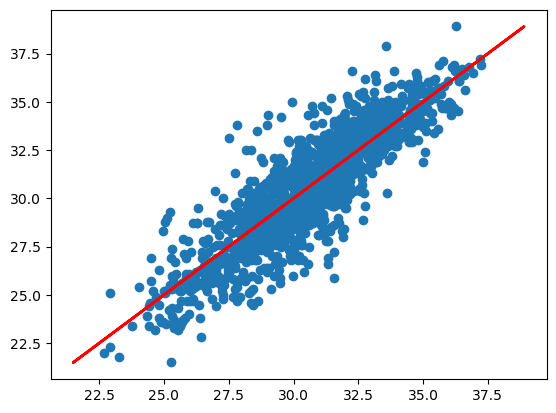

In [94]:
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

TAKING 'Next_Tmin ' AS TARGET , CREATING  Another Regression MODEL

In [95]:
x=df1.drop(['Next_Tmin'],axis=1)
y=df1['Next_Tmin']


In [96]:
x.shape

(7010, 22)

In [97]:
y.shape

(7010,)

Model Bulding
As you can see this is Regression problem in this we have continous data so we use regression model here.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [99]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.8538499848012795 On random states 65


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [101]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.8323844733657091
R2_score on train data: 83.49284057849695
Mean absolute error: 0.7911987336664231
Mean squared error: 0.9849850213042814
Root mean squared error: 0.992464115877386


In [102]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.9038535507709221
R2_score on train data: 98.64538272388175
Mean absolute error: 0.5713775731386969
Mean squared error: 0.5650002374115379
Root mean squared error: 0.7516649768424347


In [103]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.5018623817118198
R2_score on train data: 68.61721246183919
Mean absolute error: 1.3268304050154887
Mean squared error: 2.927283065086095
Root mean squared error: 1.7109304676362787


In [104]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.8870329893074219
R2_score on train data: 90.49546076215942
Mean absolute error: 0.6344254683209543
Mean squared error: 0.663845502072635
Root mean squared error: 0.814767145921235


In [105]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.8322282822027072
R2_score on train data: 83.4766516342529
Mean absolute error: 0.7907402697138526
Mean squared error: 0.985902871572131
Root mean squared error: 0.9929264180049451


In [106]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.8323844758061766
R2_score on train data: 83.4928405784956
Mean absolute error: 0.7911987240188071
Mean squared error: 0.984985006962985
Root mean squared error: 0.9924641086522903


In [107]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.7997921818101128
R2_score on train data: 100.0
Mean absolute error: 0.7879251923973611
Mean squared error: 1.1765121407595545
Root mean squared error: 1.0846714436913856


In [108]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.9103562197943618
R2_score on train data: 100.0
Mean absolute error: 0.5437155382278669
Mean squared error: 0.5267875985516421
Root mean squared error: 0.7258013492352037


Now we can check cross valdiation of all the model.

In [109]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.74099391 0.67025014 0.8015887  0.86116571 0.8605254 ]
0.7869047738257864
difference b/w R2_score and cross_val_score is: 4.54796995399227


In [110]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.01205824 -0.45553123  0.13394915  0.25590912  0.34599778]
0.053653316559177246
difference b/w R2_score and cross_val_score is: 44.820906515264255


In [111]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[0.73426483 0.68890374 0.82826584 0.86159405 0.87223397]
0.7970524868607727
difference b/w R2_score and cross_val_score is: 8.998050244664924


In [112]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.74069048 0.67067286 0.80234931 0.86125934 0.86117541]
0.7872294796050012
difference b/w R2_score and cross_val_score is: 4.4998802597705945


In [113]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.74099392 0.67025014 0.80158871 0.86116571 0.86052541]
0.7869047803938761
difference b/w R2_score and cross_val_score is: 4.547969541230046


In [114]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.44619818 0.38862893 0.59382677 0.7314377  0.66580831]
0.5651799783833651
difference b/w R2_score and cross_val_score is: 23.46122034267477


In [115]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_etr)-score7.mean())*100)

[0.73582963 0.67652249 0.81658321 0.85764618 0.856449  ]
0.7886061031909037
difference b/w R2_score and cross_val_score is: 12.175011660345803


In [ ]:
As we can see above all model R2_score and crossval_score is less and score mean is 78% inLasso(alpha=0.001)) model so this is the best model.

Hyper Parametr Tunning

In [116]:
from sklearn.model_selection import RandomizedSearchCV
param={'selection':['cyclic', 'cyclic']}
rscv=RandomizedSearchCV(Lasso(alpha=0.001),param,cv=3)
rscv.fit(x_train,y_train)
rscv.best_params_

{'selection': 'cyclic'}

In [117]:
model=Lasso(alpha=0.001,selection='cyclic')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.8322282822027072
Mean absolute error: 0.7907402697138526
Mean squared error: 0.985902871572131
Root mean squared error: 0.9929264180049451


saving Model

In [118]:
import joblib
import pickle
filename='Next_Tmin'
pickle.dump(model,open(filename,'wb'))

In [119]:
import pickle
load_model=pickle.load(open('Next_Tmin','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

83.22282822027071


Conclusion

In [120]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [121]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401
Predicted,19.921031,20.517096,24.356312,18.644949,22.209645,22.774192,24.295943,23.417819,24.730264,26.529443,...,17.663349,24.082527,25.680106,22.684611,22.613879,22.508292,25.267952,23.107373,23.197569,24.778663
Original,19.600000,20.100000,25.200000,19.600000,22.400000,23.100000,24.700000,23.100000,24.200000,26.000000,...,18.200000,23.400000,24.200000,24.300000,24.300000,23.400000,24.500000,25.300000,22.700000,25.800000


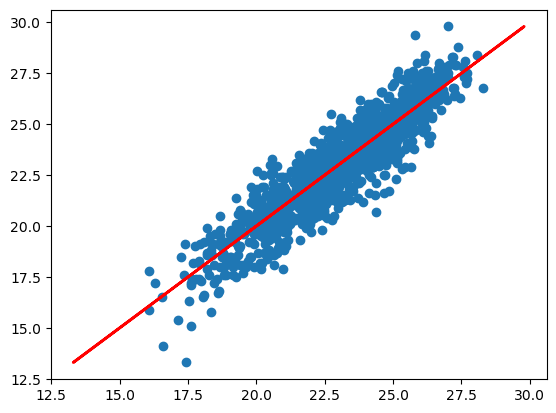

In [122]:
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')